# Finding the best ML model (House price pridection)

## 📥Importing the data

In [75]:
import pandas as pd
import numpy as np

In [76]:
houses = pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
testData = pd.read_csv('test.csv')
testData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 🧹Data cleaning 

### -checking the null values 

In [78]:
print(houses.isnull().values.any())
print(testData.isnull().values.any())

True
True


### -cleaning the traing data 

In [79]:
houses.drop(columns='Id',inplace=True)

In [80]:
#sorted list of columns with their missing data percentage in descending order
(houses.isnull().mean() * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [81]:
houses[['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1455,0,NaN
1456,0,NaN
1457,0,NaN
1458,0,NaN


#### filling missing data with NA in PoolQC and MiscFeature

In [82]:
houses.fillna({'PoolQC':'NA'},inplace=True)
houses.PoolQC.value_counts()

PoolQC
NA    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64

In [83]:
houses.fillna({'MiscFeature':'NA'},inplace=True)
houses[['MiscFeature', 'MiscVal']].head()

,MiscFeature,MiscVal
0,NA,0
1,NA,0
2,NA,0
3,NA,0
4,NA,0


##### Drop itemes that dosen't effect the price and it has high messing valuse % 

In [84]:
houses.drop(columns='Alley',inplace=True) #dosen't effect the prise and it's 93% null

In [85]:
houses.Fence.value_counts()
houses.fillna({'Fence':'NA'},inplace=True)
houses.groupby('Fence')['SalePrice'].median()
#NA" (No Fence) has the highest median price ($173,000)

#This suggests that having a fence doesn’t necessarily increase house prices. + it's 80% null NA

Fence
GdPrv    167500.0
GdWo     138750.0
MnPrv    137450.0
MnWw     130000.0
NA       173000.0
Name: SalePrice, dtype: float64

In [86]:
houses.drop(columns='Fence',inplace=True)

In [87]:
houses.fillna({'MasVnrType':'None'},inplace=True)
houses.groupby('MasVnrType')['SalePrice'].median()

MasVnrType
BrkCmn     139000.0
BrkFace    181000.0
None       143125.0
Stone      246839.0
Name: SalePrice, dtype: float64

In [88]:
houses.fillna({'FireplaceQu':'NA'},inplace=True)
houses.groupby('FireplaceQu')['SalePrice'].median()

FireplaceQu
Ex    314250.0
Fa    158000.0
Gd    206950.0
NA    135000.0
Po    131500.0
TA    187500.0
Name: SalePrice, dtype: float64

In [89]:
houses.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [90]:
houses.fillna({'LotFrontage':houses["LotFrontage"].median()}, inplace=True)

In [91]:
(houses.isnull().mean() * 100).sort_values(ascending=False)

GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 78, dtype: float64

In [92]:
#show the null cells
houses[houses.isnull().any(axis=1)][['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond', 'GarageYrBlt']]

,GarageQual,GarageType,GarageFinish,GarageCond,GarageYrBlt
17,TA,CarPort,Unf,TA,1967.0
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1407,NaN,NaN,NaN,NaN,NaN
1412,TA,Detchd,Unf,TA,1956.0
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [93]:
houses[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']]= houses[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']].fillna('NA')


In [94]:
houses.fillna({'GarageYrBlt':0}, inplace=True)
houses.fillna({'BsmtFinType2': 'NA','BsmtFinType1':'NA','BsmtExposure':'No','BsmtCond':'NA','BsmtQual':'NA'},inplace=True)


In [95]:
houses[houses.isnull().any(axis=1)][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None
1379,0.0,None


In [96]:
houses.fillna({'MasVnrArea':0},inplace=True)

In [97]:
houses[houses.isnull().any(axis=1)]['Electrical']

1379    NaN
Name: Electrical, dtype: object

In [98]:
houses.Electrical.value_counts()
houses.fillna({'Electrical':houses['Electrical'].mode()[0]},inplace=True)

In [99]:
print(houses.isnull().values.any())
print(houses.duplicated().values.any())

False
False


In [100]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NA,NA,0,12,2008,WD,Normal,250000


#### -test data should be cleaned the same way as the traing data 

In [101]:
(testData.isnull().mean() * 100).sort_values(ascending=False)

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
MasVnrType       61.274846
                   ...    
EnclosedPorch     0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleCondition     0.000000
Length: 80, dtype: float64

In [102]:
testID = testData['Id']
testData.drop(columns='Id',inplace=True)
testData.drop(columns='Fence',inplace=True)
testData.drop(columns='Alley',inplace=True)
testID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [103]:
testData.fillna({'PoolQC':'NA','MiscFeature':'NA','MasVnrType':'None'},inplace=True)
testData.fillna({'FireplaceQu':'NA'},inplace=True)
testData.fillna({'LotFrontage':testData["LotFrontage"].median()}, inplace=True)
testData[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']]= testData[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']].fillna('NA')
testData.fillna({'GarageYrBlt':0}, inplace=True)


In [104]:
testData.fillna({'BsmtFinType2': 'NA','BsmtFinType1':'NA','BsmtExposure':'No','BsmtCond':'NA','BsmtQual':'NA'},inplace=True)
testData.fillna({'MasVnrArea':0},inplace=True)

In [105]:
testData.MSZoning.mode()
testData.Utilities.mode()
testData.BsmtFullBath.median()
testData.Functional.mode()
testData.BsmtHalfBath.median()

np.float64(0.0)

In [106]:
testData.fillna({
                  'MSZoning': testData['MSZoning'].mode()[0],
                  'Utilities': testData['Utilities'].mode()[0],
                  'BsmtFullBath': testData['BsmtFullBath'].median(),
                  'Functional': testData['Functional'].mode()[0],
                  'BsmtHalfBath': testData['BsmtHalfBath'].median()
                 },inplace=True)

In [107]:
(testData.isnull().mean() * 100).sort_values(ascending=False)

BsmtFinSF2       0.06854
BsmtFinSF1       0.06854
TotalBsmtSF      0.06854
GarageArea       0.06854
SaleType         0.06854
                  ...   
PoolQC           0.00000
MiscVal          0.00000
MoSold           0.00000
YrSold           0.00000
SaleCondition    0.00000
Length: 77, dtype: float64

In [108]:
testData.BsmtFinSF2.median()
testData.BsmtFinSF1.median()
testData.TotalBsmtSF.median()
testData.GarageArea.median()
testData.SaleType.mode()

0    WD
Name: SaleType, dtype: object

In [109]:
testData.fillna({
                  'BsmtFinSF2': testData['BsmtFinSF2'].median(),
                  'BsmtFinSF1': testData['BsmtFinSF1'].median(),
                  'TotalBsmtSF': testData['TotalBsmtSF'].median(),
                  'GarageArea': testData['GarageArea'].median(),
                  'SaleType': testData['SaleType'].mode()[0]
                },inplace=True)

In [110]:
testData.GarageCars.median()
testData.KitchenQual.mode()
testData.BsmtUnfSF.median()
testData.Exterior1st.mode()
testData.Exterior2nd.mode()

0    VinylSd
Name: Exterior2nd, dtype: object

In [111]:
testData.fillna({
                 'GarageCars': testData['GarageCars'].median(),
                 'KitchenQual': testData['KitchenQual'].mode()[0],
                 'BsmtUnfSF': testData['BsmtUnfSF'].median(),
                 'Exterior1st': testData['Exterior1st'].mode()[0],
                 'Exterior2nd': testData['Exterior2nd'].mode()[0]
                },inplace=True)
print((testData.isnull().mean() * 100).sort_values(ascending=False))
print('duplecated : ',testData.duplicated().any())

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 77, dtype: float64
duplecated :  False


In [112]:
testData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,120,0,NA,NA,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NA,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,NA,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,NA,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,144,0,NA,NA,0,1,2010,WD,Normal


## 📊 Feature Separation (Numerical & Categorical)

In [113]:
num_featurs = houses.select_dtypes(include='number')
num_featurs.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [114]:
cat_featurs = houses.select_dtypes(include=['object', 'category'])
cat_featurs.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,NA,Attchd,RFn,TA,TA,Y,NA,NA,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NA,NA,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,NA,NA,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NA,NA,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,NA,NA,WD,Normal


In [115]:
testNum = testData.select_dtypes(include='number')
testNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [116]:
testCat = testData.select_dtypes(include=['object','category'])
testCat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,NA,Attchd,Unf,TA,TA,Y,NA,NA,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,NA,Attchd,Unf,TA,TA,Y,NA,Gar2,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Attchd,Fin,TA,TA,Y,NA,NA,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Attchd,Fin,TA,TA,Y,NA,NA,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,NA,Attchd,RFn,TA,TA,Y,NA,NA,WD,Normal


## 🔠 Encoding Categorical Features (OneHot, Ordinal & label)

In [117]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

#### -OneHot Encoder

In [118]:
catOHE_cols=['Street','LotShape','MSZoning','LotConfig','LandSlope','Utilities','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']

ohe = OneHotEncoder(sparse_output= False)
# For training data
encoded = ohe.fit_transform(cat_featurs[catOHE_cols])
encoded_df = pd.DataFrame(encoded, columns= ohe.get_feature_names_out(catOHE_cols))
encoded_df.index = cat_featurs.index  # Keep the index aligned
cat_featurs = pd.concat([cat_featurs.drop(columns=catOHE_cols),encoded_df],axis=1)
# For test data
encoded = ohe.transform(testCat[catOHE_cols])
encoded_df = pd.DataFrame(encoded, columns= ohe.get_feature_names_out(catOHE_cols))
encoded_df.index = testCat.index  # Keep the index aligned
testCat = pd.concat([testCat.drop(columns= catOHE_cols), encoded_df], axis=1)

testCat.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Lvl,TA,TA,TA,TA,No,Rec,LwQ,TA,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Lvl,TA,TA,TA,TA,No,ALQ,Unf,TA,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Lvl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Lvl,TA,TA,TA,TA,No,GLQ,Unf,Ex,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,HLS,Gd,TA,Gd,TA,No,ALQ,Unf,Ex,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
cat_featurs.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Lvl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Lvl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Lvl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Lvl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Y,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Lvl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### -Ordinal Encoder

In [120]:
catORd_cols = ['PoolQC','GarageCond','GarageQual','FireplaceQu','KitchenQual','HeatingQC','BsmtCond','BsmtQual','ExterCond','ExterQual']


ex_order = ['NA','Po','Fa','TA','Gd','Ex']

for col in catORd_cols:
   ore = OrdinalEncoder(categories=[ex_order])
   cat_featurs[[col]] = ore.fit_transform(cat_featurs[[col]])
   testCat[[col]] = ore.transform(testCat[[col]])


cat_featurs.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Lvl,4.0,3.0,4.0,3.0,No,GLQ,Unf,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Lvl,3.0,3.0,4.0,3.0,Gd,ALQ,Unf,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Lvl,4.0,3.0,4.0,3.0,Mn,GLQ,Unf,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Lvl,3.0,3.0,3.0,4.0,No,ALQ,Unf,4.0,Y,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Lvl,4.0,3.0,4.0,3.0,Av,GLQ,Unf,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
gdORD_cols = ['BsmtFinType2','BsmtFinType1']

gd_order = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']

for col in gdORD_cols:
   ore = OrdinalEncoder(categories=[gd_order])
   cat_featurs[[col]] = ore.fit_transform(cat_featurs[[col]])
   testCat[[col]] = ore.transform(testCat[[col]])

cat_featurs.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Lvl,4.0,3.0,4.0,3.0,No,6.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Lvl,3.0,3.0,4.0,3.0,Gd,5.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Lvl,4.0,3.0,4.0,3.0,Mn,6.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Lvl,3.0,3.0,3.0,4.0,No,5.0,1.0,4.0,Y,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Lvl,4.0,3.0,4.0,3.0,Av,6.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
LandCon_order = ['Low','HLS','Bnk','Lvl']
BsmtExpo_order = ['NA','No','Mn','Av','Gd']

ore = OrdinalEncoder(categories=[LandCon_order])
cat_featurs[['LandContour']] = ore.fit_transform(cat_featurs[['LandContour']])
testCat[['LandContour']] = ore.transform(testCat[['LandContour']])

ore = OrdinalEncoder(categories=[BsmtExpo_order])
cat_featurs['BsmtExposure'] = ore.fit_transform(cat_featurs[['BsmtExposure']])
testCat[['BsmtExposure']] = ore.transform(testCat[['BsmtExposure']])

cat_featurs.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.0,4.0,3.0,4.0,3.0,1.0,6.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,3.0,3.0,4.0,3.0,4.0,5.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,4.0,3.0,4.0,3.0,2.0,6.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3.0,3.0,3.0,4.0,1.0,5.0,1.0,4.0,Y,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,4.0,3.0,4.0,3.0,3.0,6.0,1.0,5.0,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### -Label Encoder

In [123]:
Lb = LabelEncoder()
cat_featurs['CentralAir'] = Lb.fit_transform(cat_featurs['CentralAir'])
testCat['CentralAir'] = Lb.transform(testCat['CentralAir'])
cat_featurs.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.0,4.0,3.0,4.0,3.0,1.0,6.0,1.0,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,3.0,3.0,4.0,3.0,4.0,5.0,1.0,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,4.0,3.0,4.0,3.0,2.0,6.0,1.0,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3.0,3.0,3.0,4.0,1.0,5.0,1.0,4.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,4.0,3.0,4.0,3.0,3.0,6.0,1.0,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
testCat.head()

,LandContour,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,3.0,3.0,3.0,3.0,1.0,5.0,1.0,3.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,3.0,4.0,3.0,1.0,6.0,1.0,4.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3.0,3.0,3.0,3.0,1.0,6.0,1.0,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,4.0,3.0,4.0,3.0,1.0,5.0,1.0,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 📏 Feature Scaling (StandardScaler)

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
num_featurs.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [127]:
testNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [128]:

scaler = StandardScaler()
num_featurs_scaled = pd.DataFrame(scaler.fit_transform(num_featurs.drop(columns='SalePrice')), columns=num_featurs.drop(columns='SalePrice').columns)

testNumScal = pd.DataFrame(scaler.transform(testNum), columns=testNum.columns)

num_featurs_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [129]:
testNumScal.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.872563,0.460320,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,0.053428,0.604293,...,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.64521
1,-0.872563,0.505733,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,1.051363,-0.288653,...,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.64521
2,0.073375,0.187842,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,0.761852,-0.288653,...,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.64521
3,0.073375,0.369494,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,0.347326,-0.288653,...,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.64521
4,1.492282,-1.219961,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,-0.396190,-0.288653,...,0.154492,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688,-1.969111,1.64521


### -Concating the features

In [130]:

x_train = pd.concat([num_featurs_scaled, cat_featurs], axis=1)
y_train = num_featurs['SalePrice']


x_test = pd.concat([testNumScal, testCat], axis=1)

## 🤖 Model Training 

In [131]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import xgboost as xgb

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

In [ ]:
#testing the modeles to get the best one
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} - Mean RMSE: {rmse_scores.mean()}, Std: {rmse_scores.std()}")


Linear Regression - Mean RMSE: 35347.3869143291, Std: 7352.074666328734
Ridge - Mean RMSE: 32643.284472828236, Std: 7859.2051903064785


c:\Users\zgrri\OneDrive\سطح المكتب\house-prices-advanced-regression-techniques\mlEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\zgrri\OneDrive\سطح المكتب\house-prices-advanced-regression-techniques\mlEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\zgrri\OneDrive\سطح المكتب\house-prices-advanced-regression-techniques\mlEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Obje

Lasso - Mean RMSE: 34250.55108058905, Std: 7852.7587367088245
Random Forest - Mean RMSE: 30167.220625173773, Std: 4131.756099795718
Gradient Boosting - Mean RMSE: 25714.70985333495, Std: 3068.630918421007
XGBoost - Mean RMSE: 28396.279213389724, Std: 4112.323581044001


## 📈 Model Evaluation 
 ####      based on the resulet above:
       -Gradient Boosting has the lowest mean RMSE, indicating that it is making the most accurate predictions on average.

       -Its standard deviation (Std) is also relatively low, which means it is more consistent across the folds.

In [163]:
from scipy.stats import uniform, randint

param_distributions = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),  # from 0.6 to 1.0
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'loss': ['squared_error', 'huber', 'absolute_error']
}

gbr = GradientBoostingRegressor()

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_distributions,
    n_iter=50,  # Number of different combinations to try
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

random_search.fit(x_train, y_train)

print("Best parameters found:")
print(random_search.best_params_)

print("\nBest RMSE:")
print(np.sqrt(-random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:
{'learning_rate': np.float64(0.06248647812878086), 'loss': 'squared_error', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178, 'subsample': np.float64(0.6372411071223597)}

Best RMSE:
26859.16552702104


## 📤 Prediction on Test Data

In [164]:
#random_state=42 to fex the seed for every run to get the same result
gbr_model = GradientBoostingRegressor(**random_search.best_params_, random_state=42)#By using **, you unpack the dictionary into keyword arguments.

gbr_model.fit(x_train, y_train)
y_pred = gbr_model.predict(x_test)
y_pred

array([132366.06795304, 165526.8940723 , 184897.38787931, ...,
       166970.5720555 , 123316.4276816 , 223627.95910545], shape=(1459,))

In [165]:
submission = pd.DataFrame({
     'Id': testID,
     'SalePrice': y_pred
})
submission.to_csv('House_pice_pridiction_model.csv', index=False)

In [166]:
submission

,Id,SalePrice
0,1461,132366.067953
1,1462,165526.894072
2,1463,184897.387879
3,1464,181777.795212
4,1465,194489.969695
...,...,...
1454,2915,82291.592089
1455,2916,78193.491180
1456,2917,166970.572056
1457,2918,123316.427682


## Visualize Model’s Predictions:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

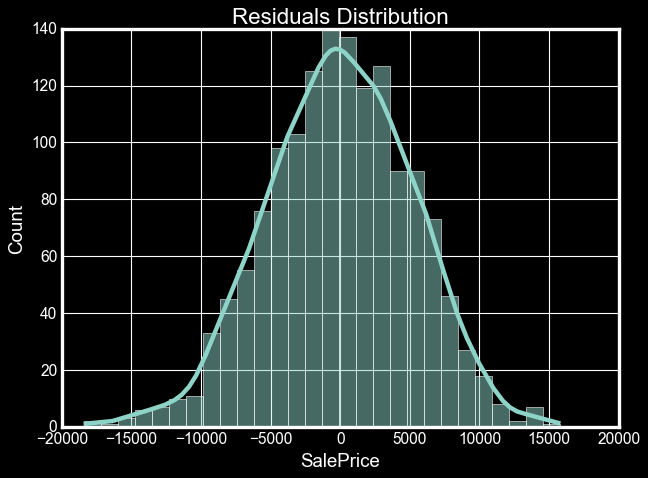

In [167]:
plt.style.use('dark_background')
residuals = y_train - gbr_model.predict(x_train)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


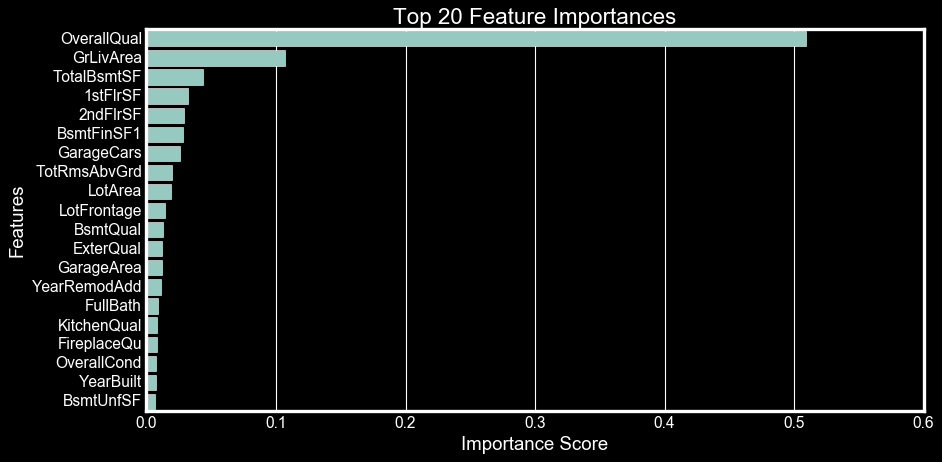

In [168]:
#Visualize Feature Importances
# Get importances
importances = gbr_model.feature_importances_
features = x_train.columns

# Sort
indices = importances.argsort()[::-1]

# Plot top 20
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()